# 基于Streamlit创建聊天界面

通过聊天方式，完成与大模型互动，得到Neo4j查询结果

## 整体情况说明

1、代码详见本目录下  Streamlit-Chatbox.py

2、基于Streamlit实现简单文字聊天简单场景

3、具备少量历史聊天记录显示功能

4、后端API采用Ollama原生API

## 原生Ollama服务调用效果
1、安装Streamlit组件

In [1]:
%pip install streamlit
%pip install streamlit-chat

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


2、调用Ollama原生API

In [2]:
def get_response_material(query, history):
    
    # 构建请求的URL        
    url = "http://localhost:11434/api/chat"

    payload = {
        "model": "qwen:7b",
        "messages": [
            {
                "role": "user",
                "content": query
            }
        ],
        "stream": False
    }
    headers = {
        "Content-Type": "",
        "content-type": "application/json"
    }

    response = requests.request("POST", url, json=payload, headers=headers)
    
    # 假设API返回的是一个JSON对象，其中包含'response'和'material'两个字段
    api_response = response.json()
    
    # 提取所需的值
    chat_response = api_response.get('message')
    material = api_response.get('model')
    
    # 返回两个值
    return chat_response, material

3、代码编写后，启动程序

In [ ]:
!streamlit run .\Streamlit-Chatbox.py

4、测试连接情况
在聊天界面输入：你是谁？

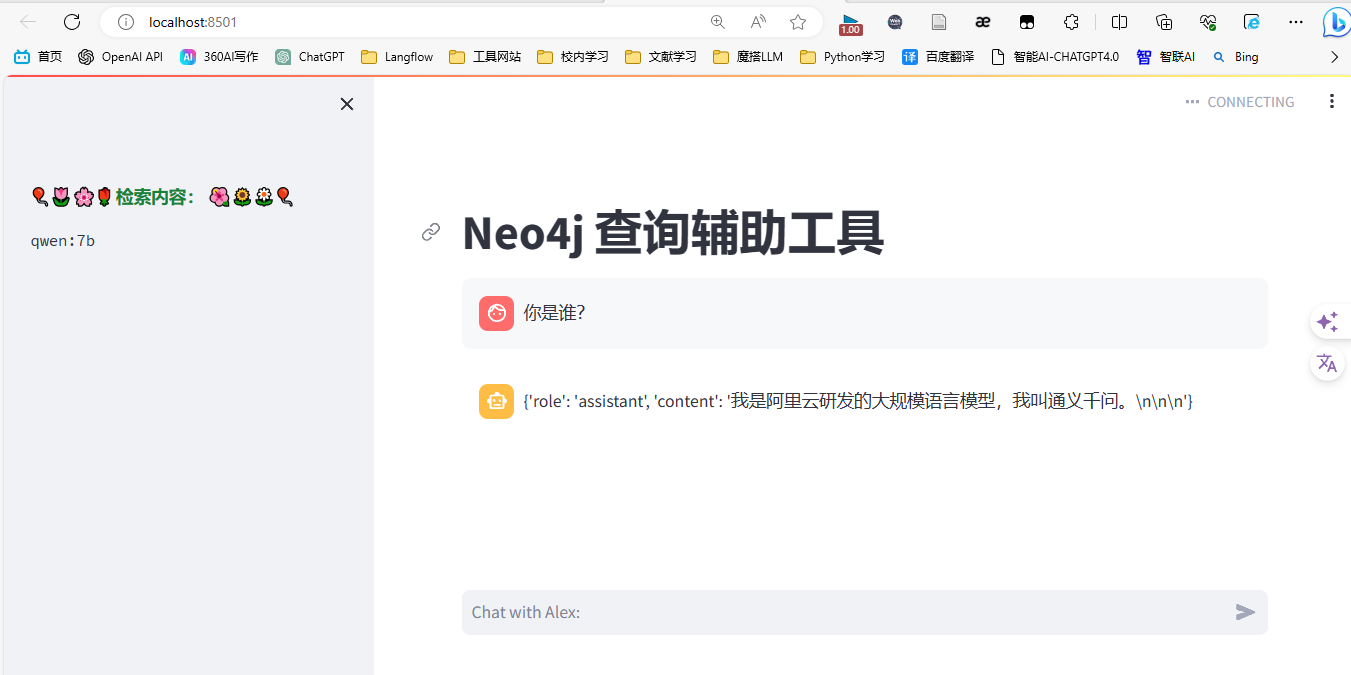

## 封装Neo4j查询服务调用效果

1、通过FastAPI封装Neo4j处理服务

详见：Local_Ollama_Neo4jServer.py

2、使用APIPost测试服务

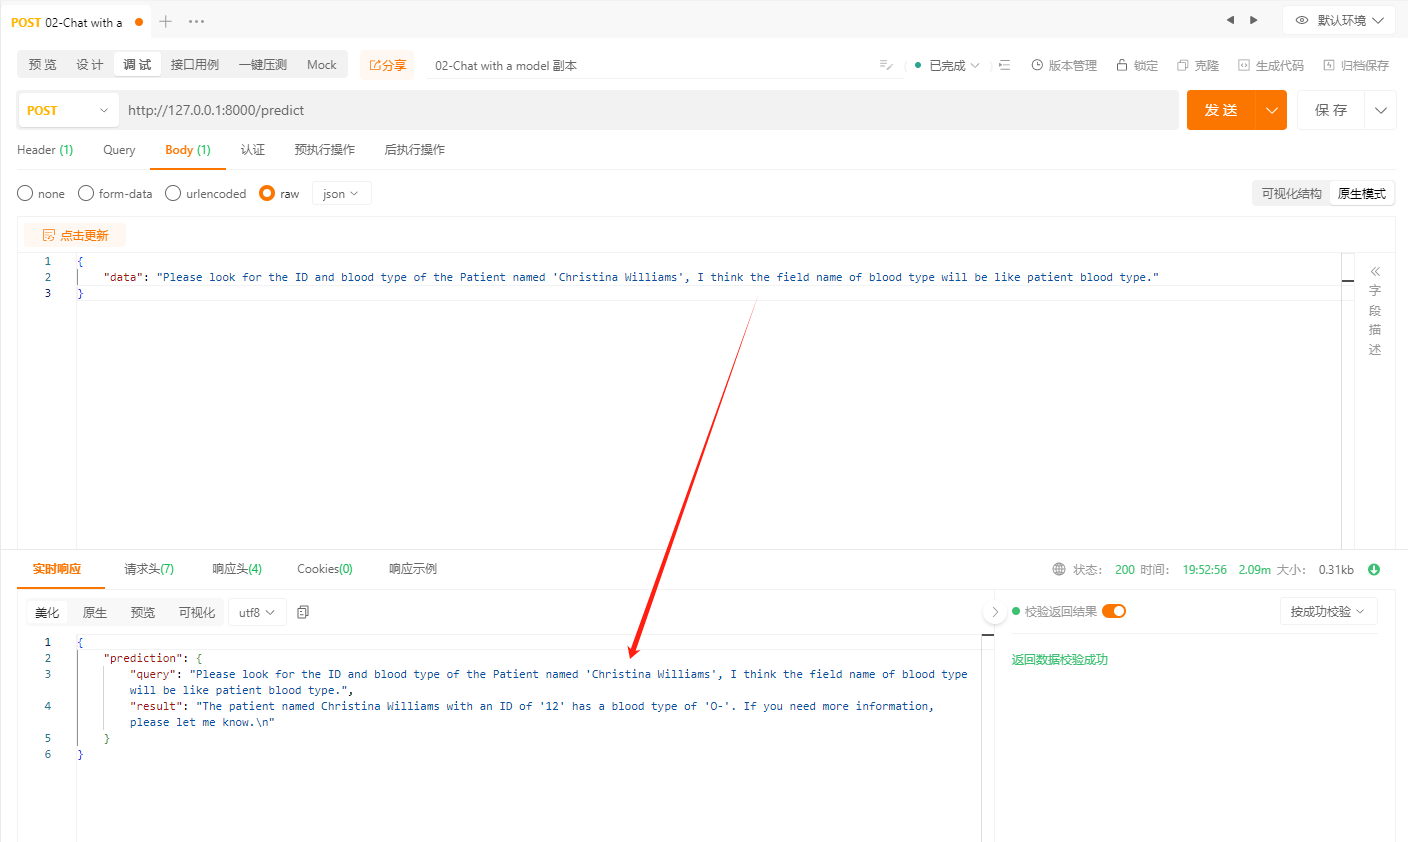

3、使用Streamlit调用该服务

In [ ]:

def get_response_Neo4jNote(query, history):
   
    # 构建请求的URL        
    url = "http://127.0.0.1:8000/predict"

    payload = {
        "data": query
    }

    response = requests.request("POST", url, json=payload)"""  """
    
    # 假设API返回的是一个JSON对象，其中包含'response'和'material'两个字段
    api_response = response.json()
    
    # 提取所需的值
    prediction = api_response.get('prediction')
    chat_response = " Result: \n" + prediction.get('result')
    material = "Ollama+Neo4j"
    
    # 返回两个值
    return chat_response, material

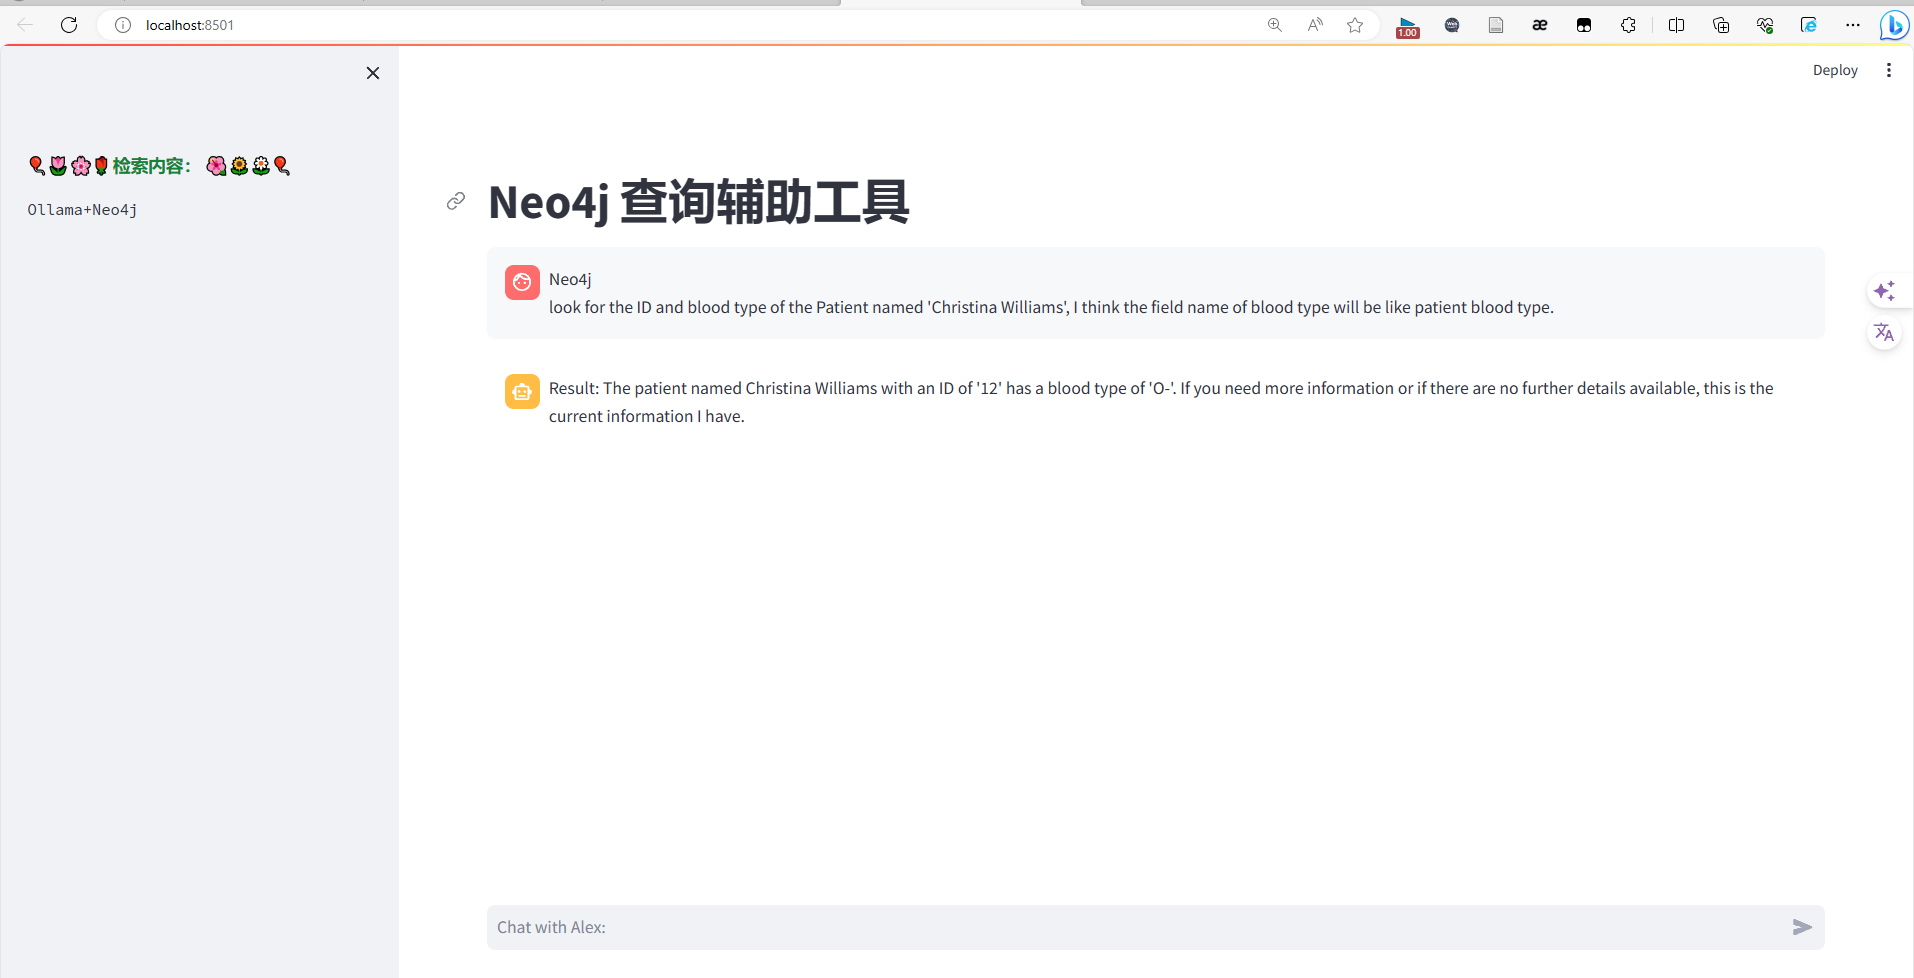

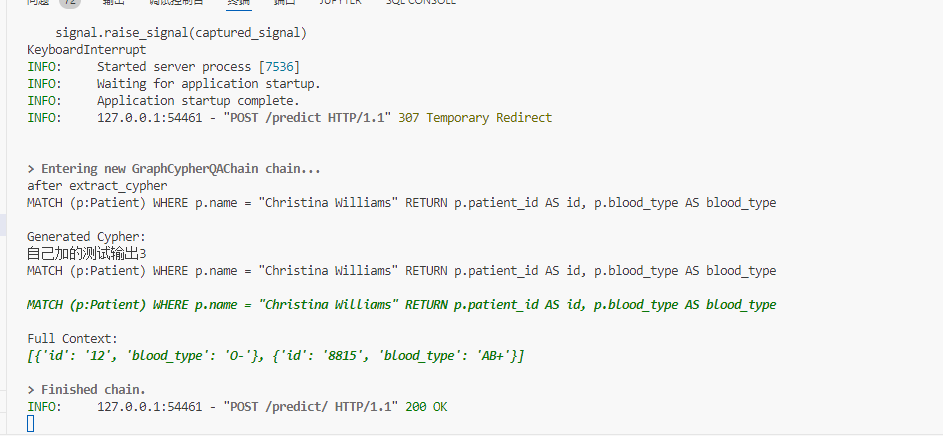